In [1]:
#The first step is loading our pickel files for dataset

In [2]:
import pickle
import numpy as np
import torch

infile = open("train.pkl",'rb')
dataset = pickle.load(infile)
infile.close()

In [3]:
for img_id in range(dataset.shape[0]):
    dataset[img_id] = (dataset[img_id] - torch.min(dataset[img_id])) / (torch.max(dataset[img_id]) - torch.min(dataset[img_id]))
noisy_dataset = dataset + (50 / 255) * np.random.randn(200*1600,40,40)

In [4]:
training_data = []
for i, img in enumerate(noisy_dataset):
    training_data.append((img[None,:,:], dataset[i,None,:,:]))

In [5]:
train_loader = torch.utils.data.DataLoader(training_data,batch_size=128,shuffle=True)

In [6]:
len(training_data[0][0])

1

tensor([[[[0.3501, 0.4776, 0.4817,  ..., 0.0353, 0.0149, 0.0000],
          [0.4612, 0.5514, 0.5543,  ..., 0.0387, 0.0146, 0.0015],
          [0.5567, 0.6096, 0.5958,  ..., 0.0278, 0.0124, 0.0031],
          ...,
          [0.9700, 0.9812, 0.9346,  ..., 0.2790, 0.2889, 0.2987],
          [0.9638, 0.9653, 0.8396,  ..., 0.2893, 0.2706, 0.2750],
          [0.9553, 0.8942, 0.7262,  ..., 0.2935, 0.2843, 0.2843]]],


        [[[0.1950, 0.4472, 0.4457,  ..., 0.3832, 0.3945, 0.4425],
          [0.4610, 0.1414, 0.4070,  ..., 0.4513, 0.4489, 0.4969],
          [0.5584, 0.3215, 0.3243,  ..., 0.4530, 0.4449, 0.4696],
          ...,
          [0.3941, 0.3512, 0.3597,  ..., 0.5620, 0.5458, 0.4813],
          [0.4811, 0.3752, 0.3527,  ..., 0.5089, 0.5188, 0.5121],
          [0.4269, 0.3473, 0.3384,  ..., 0.4596, 0.4455, 0.4643]]],


        [[[0.2590, 0.2797, 0.3705,  ..., 0.4744, 0.5197, 0.4926],
          [0.4382, 0.3297, 0.2928,  ..., 0.4029, 0.5252, 0.5590],
          [0.4833, 0.1692, 0.1807,  ..

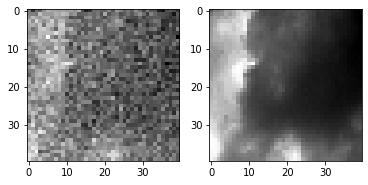

In [7]:
#Now that the dataset is prepared and shuffled, we can call the model function
import matplotlib.pyplot as plt
for noisy, clean in train_loader:
    print(clean)
    plt.subplot(1,2,1)
    plt.imshow(noisy[0,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(clean[0,0], cmap='gray')
    break

In [10]:
import import_ipynb


In [11]:
import DnCNN_IVP

importing Jupyter notebook from DnCNN_IVP.ipynb


In [12]:
#Now that it is imported, let us define a device for GPU cuda
device=torch.device('cuda:0')

In [15]:
N=128
from torch import nn
class loss_new(nn.Module): #N is dataset size
  def __init__(self):
    super(loss_new,self).__init__()
  def forward(self,out,y,x):
    return torch.norm(out-(y-x))/(2*N) #Where does N get defined?

In [16]:
import torch
from torch import optim

In [17]:
criterion=loss_new()

In [18]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [19]:
#Need to set a batch size of 128
#Tensor to data loader
def training_function(net, loader, optim, model_name, epochs=50):
  from tqdm import tqdm
  loss_list=[]
  net.train()
  """
    y is the noisy image and it is used as input

    x is the noiseless image and it is used as a target label
  """
    
  for e in tqdm(range(epochs)): #For each epoch
    train_loss=0
    for i, (noisy, clean) in enumerate(loader):
      optim.zero_grad()#zero grad so they don't stack
      clean = clean.to(device, dtype=torch.float)
      noisy = noisy.to(device, dtype=torch.float)
      prediction = net(noisy)
      batch_loss = criterion(prediction, noisy, clean)
      batch_loss.backward()
      optim.step()
      scheduler.step()
      train_loss += batch_loss.item()

    train_loss = train_loss/len(loader)
    loss_list.append(train_loss)

    print ("Epoch {}: Has a loss of Loss: {:.6f}".format(e+1 ,train_loss))

  torch.save(model.state_dict(), model_name + '_D15.pt')
  return loss_list

In [ ]:
from torch.optim.lr_scheduler import StepLR
model=DnCNN_IVP.DnCNN(1,1,15)
device=torch.device('cuda:0')
model.to(device)
epoch = 50

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=1, gamma=0.001**(1/50))
print('beginning with training 15')

plot_me_50_D15=training_function(model, train_loader, optimizer, 'dncnn_noise_50', 50)

beginning with training 15


  2%|▏         | 1/50 [03:42<3:02:03, 222.92s/it]

Epoch 1: Has a loss of Loss: 0.498514


  4%|▍         | 2/50 [07:25<2:58:20, 222.93s/it]

Epoch 2: Has a loss of Loss: 0.449094


  6%|▌         | 3/50 [11:08<2:54:37, 222.92s/it]

Epoch 3: Has a loss of Loss: 0.449048


  8%|▊         | 4/50 [14:51<2:50:54, 222.93s/it]

Epoch 4: Has a loss of Loss: 0.449065


 10%|█         | 5/50 [18:34<2:47:11, 222.92s/it]

Epoch 5: Has a loss of Loss: 0.449076


 12%|█▏        | 6/50 [22:17<2:43:27, 222.91s/it]

Epoch 6: Has a loss of Loss: 0.449056


 14%|█▍        | 7/50 [26:00<2:39:45, 222.92s/it]

Epoch 7: Has a loss of Loss: 0.449044


 16%|█▌        | 8/50 [29:43<2:36:02, 222.92s/it]

Epoch 8: Has a loss of Loss: 0.449063


 18%|█▊        | 9/50 [33:26<2:32:19, 222.92s/it]

Epoch 9: Has a loss of Loss: 0.449075


 20%|██        | 10/50 [37:09<2:28:36, 222.91s/it]

Epoch 10: Has a loss of Loss: 0.449088


 22%|██▏       | 11/50 [40:52<2:24:53, 222.91s/it]

Epoch 11: Has a loss of Loss: 0.449121


 24%|██▍       | 12/50 [44:35<2:21:10, 222.92s/it]

Epoch 12: Has a loss of Loss: 0.449113


 26%|██▌       | 13/50 [48:18<2:17:29, 222.95s/it]

Epoch 13: Has a loss of Loss: 0.449080


 28%|██▊       | 14/50 [52:01<2:13:46, 222.95s/it]

Epoch 14: Has a loss of Loss: 0.449067


 30%|███       | 15/50 [55:43<2:10:02, 222.94s/it]

Epoch 15: Has a loss of Loss: 0.449087


 32%|███▏      | 16/50 [59:26<2:06:19, 222.93s/it]

Epoch 16: Has a loss of Loss: 0.449055


 34%|███▍      | 17/50 [1:03:09<2:02:36, 222.93s/it]

Epoch 17: Has a loss of Loss: 0.449116


 36%|███▌      | 18/50 [1:06:52<1:58:52, 222.90s/it]

Epoch 18: Has a loss of Loss: 0.449122


 38%|███▊      | 19/50 [1:10:35<1:55:10, 222.91s/it]

Epoch 19: Has a loss of Loss: 0.449048


 40%|████      | 20/50 [1:14:18<1:51:27, 222.91s/it]

Epoch 20: Has a loss of Loss: 0.449065


 42%|████▏     | 21/50 [1:18:01<1:47:44, 222.91s/it]

Epoch 21: Has a loss of Loss: 0.449063


 44%|████▍     | 22/50 [1:21:44<1:44:01, 222.90s/it]

Epoch 22: Has a loss of Loss: 0.449119


 46%|████▌     | 23/50 [1:25:27<1:40:17, 222.88s/it]

Epoch 23: Has a loss of Loss: 0.449078


 48%|████▊     | 24/50 [1:29:09<1:36:35, 222.89s/it]

Epoch 24: Has a loss of Loss: 0.449085


 50%|█████     | 25/50 [1:32:52<1:32:52, 222.90s/it]

Epoch 25: Has a loss of Loss: 0.449102


 52%|█████▏    | 26/50 [1:36:35<1:29:09, 222.88s/it]

Epoch 26: Has a loss of Loss: 0.449089


 54%|█████▍    | 27/50 [1:40:18<1:25:26, 222.88s/it]

Epoch 27: Has a loss of Loss: 0.449103


 56%|█████▌    | 28/50 [1:44:01<1:21:43, 222.88s/it]

Epoch 28: Has a loss of Loss: 0.449096


 58%|█████▊    | 29/50 [1:47:44<1:18:00, 222.88s/it]

Epoch 29: Has a loss of Loss: 0.449078


 60%|██████    | 30/50 [1:51:27<1:14:18, 222.91s/it]

Epoch 30: Has a loss of Loss: 0.449117


 62%|██████▏   | 31/50 [1:55:10<1:10:35, 222.92s/it]

Epoch 31: Has a loss of Loss: 0.449077


 64%|██████▍   | 32/50 [1:58:53<1:06:52, 222.92s/it]

Epoch 32: Has a loss of Loss: 0.449072


 66%|██████▌   | 33/50 [2:02:36<1:03:09, 222.92s/it]

Epoch 33: Has a loss of Loss: 0.449069


 68%|██████▊   | 34/50 [2:06:19<59:26, 222.92s/it]  

Epoch 34: Has a loss of Loss: 0.449083


 70%|███████   | 35/50 [2:10:01<55:43, 222.91s/it]

Epoch 35: Has a loss of Loss: 0.449067


 72%|███████▏  | 36/50 [2:13:44<52:00, 222.91s/it]

Epoch 36: Has a loss of Loss: 0.449051


 74%|███████▍  | 37/50 [2:17:27<48:17, 222.90s/it]

Epoch 37: Has a loss of Loss: 0.449079


 76%|███████▌  | 38/50 [2:21:10<44:34, 222.90s/it]

Epoch 38: Has a loss of Loss: 0.449119


 78%|███████▊  | 39/50 [2:24:53<40:51, 222.89s/it]

Epoch 39: Has a loss of Loss: 0.449116


 80%|████████  | 40/50 [2:28:36<37:08, 222.86s/it]

Epoch 40: Has a loss of Loss: 0.449073


 82%|████████▏ | 41/50 [2:32:19<33:25, 222.88s/it]

Epoch 41: Has a loss of Loss: 0.449062


 84%|████████▍ | 42/50 [2:36:02<29:43, 222.90s/it]

Epoch 42: Has a loss of Loss: 0.449090


In [ ]:
with open('training_loss_noise_50_D15.txt', 'w') as f:
    f.writelines([str(loss) + '\n' for loss in plot_me_50_D15])